# Phase 3 Final Project Submission
- Student name: Kevin Spring
- Student pace: Flex
- Scheduled project review date/time: (Deadline) October 17 2022
- Instructor name: Morgan Jones
- Blog post URL:

# Project Description

## Project Overview
For this project, you will engage in the full data science process from start to finish, solving a classification problem using a dataset of your choice.

## Business Problem and Data
Similar to the Phase 2 project, it is up to you to define a stakeholder and business problem. Unlike the Phase 2 project, you are also responsible for choosing a dataset.

## Key Points
### Classification
For this project, you must be modeling a classification problem. Classification is used when the target variable is a category

### Findings and Recommendations
In the previous two projects, the framing was primarily descriptive and inferential, meaning that you were trying to understand the distributions of variables and the relationship between them. For this project you can still use these techniques, but make sure you are also using a predictive approach.

A predictive finding might include:

- How well your model is able to predict the target
- What features are most important to your model

A predictive recommendation might include:

- The contexts/situations where the predictions made by your model would and would not be useful for your stakeholder and business problem
- Suggestions for how the business might modify certain input variables to achieve certain target results

### Iterative Approach to Modeling
The expectations from the Phase 2 project still stand:

> You should demonstrate an iterative approach to modeling. This means that you must build multiple models. Begin with a basic model, evaluate it, and then provide justification for and proceed to a new model. After you finish refining your models, you should provide 1-3 paragraphs in the notebook discussing your final model.

With the additional techniques you have learned in Phase 3, be sure to explore:

1. Model features and preprocessing approaches
2. Different kinds of models (logistic regression, k-nearest neighbors, decision trees, etc.)
3. Different model hyperparameters

At minimum you must build three models:
- A simple, interpretable baseline model (logistic regression or single decision tree)
- A more-complex model (e.g. random forest)
- A version of either the simple model or more-complex model with tuned hyperparameters

### Classification Metrics
You must choose appropriate classification metrics and use them to evaluate your models. *Choosing the right classification metrics is a key data science skill*, and should be informed by data exploration and the business problem itself. You must then use this metric to evaluate your model performance using both training and testing data.

## Summary
- 

# Overview / Introduction

## Rubric
- Assesses how well students explain the value of their projects. We frame value in terms of the problems and stakeholders that are the focus of the project.
- Students must explain how their projects address a real-world problem
- A real-world problem is an actual problem faced by an actual stakeholder 
    - A stakeholder is a specific individual, group of people, or organization
    - A problem is a challenge faced by a stakeholder in pursuit of some goal
    - A real-world problem is one that exists in reality, i.e. students could present the project to an actual human being and they could actually find value in it.
- Notebook clearly explains the project’s value for helping a specific stakeholder solve a real-world problem.
    - Introduction explains the real-world problem the project aims to solve
    - Introduction identifies stakeholders who could use the project and how they would use it
    - Conclusion summarizes implications of the project for the real-world problem and stakeholders 
    
## Business Understanding

Moderna, Inc. is a biotechnology company based in Cambridge, Massachusetts focused on RNA therapeutics such as mRNA vaccines. The use of RNA therapeutics reduces the demands of design and speeds up production. With the success of Moderna’s COVID-19 vaccine, Moderna has the resources and investment to produce other RNA-based vaccines for diseases such as influenza, HIV, and various cancer.

Moderna needs knowledge of susceptible population vaccination patterns. While a vaccine may be 99% effective, it is only going to help if a patient is given the vaccine. In this regard, Modern needs knowledge of how people's backgrounds, opinions, and health behaviors are related to their personal vaccination patterns. With this understanding, Moderna can design targeted promotions on their vaccines and get susceptible populations vaccinated.



# OSEMN Model
![OSEMN](images/OSEMN-workflow.PNG)

# Data Understanding

## Rubric


- Justify the inclusion of features based on their properties and relevance for the project
- Identify any limitations of the data that have implications for the project

## Describe the data sources
In 2009, a novel influenza virus, H1N1 or ‘swine flu’, began to circulate in the United States. In June 2009, the World Health Organization declared H1N1 a pandemic. A separate vaccine was developed and available to the public by the end of 2009. This vaccine was separate from the traditional influenza vaccine because H1N1 emerged too late to be included in the trivalent seasonal influenza vaccine for 2009.

Between 2009 and 2010, the National 2009 H1N1 Flu Survey (NHFS) was conducted by the CDC. This phone survey asked respondents whether they had received the H1N1 influenza and seasonal influenza vaccines and additional questions covering their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. The target population for the NHFS was all persons in the United States aged 6 months and older. NHFS used independent, quarterly samples of landline and cellular telephone numbers in each of the states and the District of Columbia.

A partially cleaned version of the 2009 NHFS survey was obtained from [Driven Data](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#metric)

## Explain why the data are suitable for the project
While this data is over 10 years old and targets only part of the potential vaccine cocktail Moderna, Inc. will include, this dataset can be used to build a predictive model in line with Moderna’s needs. This time period accurately reflects our current period of having a regular seasonal flu vaccine and a separate novel respiratory virus circulating. Moderna Inc. wants to have a predictive model to identify individuals that will be vaccinated against influenza and COVID-19 in a combined vaccine. The last time there was a serious novel respiratory virus pandemic like COVID-19 was in 2009 during the H1N1 pandemic. After 2009, H1N1 was included in the seasonal influenza vaccine and the population only had to have a single influenza vaccination. Moderna’s mRNA vaccine technology shows 90+% effectiveness against symptoms and the traditional seasonal influenza vaccine is 40-60% effective. It is expected that Moderna’s combined influenza-CoV vaccine will supplant the current seasonal influenza vaccine just as the combined seasonal-H1N1 vaccine did after 2009.






In [1]:
# Import the data

import pandas as pd

data_features = pd.read_csv('data/training_set_features.csv') # predictors
data_target = pd.read_csv('data/training_set_labels.csv') # target

## Size and descriptive statistics for all features used in the analysis
### H1N1 vaccine information
Variables associated with H1N1 will be used as a stand-in and substitute for a new respiratory virus. While this is not exactly data on SARS-CoV-2, both are highly contagious, new respiratory viruses.

The following variables will be removed from the dataset and not used to build the prediction model:
* respondent_id
* h1n1_vaccine

The rest of the variables will be kept and used to build predict if a person will receive the seasonal influenza vaccination.

In [2]:
# Remove unnecessary or redundant variables
data_features.drop(['respondent_id'], axis=1, inplace=True)
data_target.drop(['respondent_id', 'h1n1_vaccine'], axis=1, inplace=True)

# merge both datasets
data = pd.concat([data_features, data_target], axis=1)

In [3]:
# Shape of data features
data.shape

(26707, 36)

### Size of dataset
* 26,707 records
* 36 variables

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

| Variable                      | Data Type | Description                                                                               | Values                                                                                                      |
|-------------------------------|-----------|--------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------|
| `h1n1_concern`                | Discrete  | Level of concern about H1N1 flu                                                      | 0 = Not at all concerned, 1 = Not very concerned, 2 = Somewhat concerned, 3 = Very concerned,                    |
| `h1n1_knowledge`              | Discrete  | Level of knowledge about H1N1 flu                                                    | 0 = No knowledge, 1 = A little knowledge, 2 = A lot of knowledge,                                                |
| `behavioral_antiviral_meds`   | Binary    | Has taken antiviral medication                                                       | 0 = No, 1 = Yes                                                                                                  |
| `behavioral_avoidance         | Binary    | Has avoided close contact with others with flu-like symptoms                         | 0 = No, 1 = Yes                                                                                                  |
| `behavioral_face_mask`        | Binary    | Has bought a face mask                                                               | 0 = No, 1 = Yes                                                                                                  |
| `behavioral_large_gatherings' | Binary    | Has reduced time at large gatherings                                                 | 0 = No, 1 = Yes                                                                                                  |
| `behavioral_outside_home`     | Binary    | Has reduced contact with people outside of own household                             | 0 = No, 1 = Yes                                                                                                  |
| `behavioral_touch_face`       | Binary    | Has avoided touching eyes, nose, or mouth                                            | 0 = No, 1 = Yes                                                                                                  |
| `doctor_recc_h1n1`            | Binary    | H1N1 flu vaccine was recommended by doctor                                           | 0 = No, 1 = Yes                                                                                                  |
| `doctor_recc_seasonal`        | Binary    | Seasonal flu vaccine was recommended by doctor                                       | 0 = No, 1 = Yes                                                                                                  |
| `chronic_med_condition`       | Binary    | Has chronic medical condition                                                        | 0 = No, 1 = Yes                                                                                                  |
| `children_under_6_months`     | Binary    | Has regular close contact with a child under the age of six months                   | 0 = No, 1 = Yes                                                                                                  |
| `health_worker`               | Binary    | Is a healthcare worker                                                               | 0 = No, 1 = Yes                                                                                                  |
| `health_insurance`            | Binary    | Has health insurance                                                                 | 0 = No, 1 = Yes                                                                                                  |
| `opinion_h1n1_vacc_effective` | Discrete  | Respondent's opinion about H1N1 vaccine effectiveness                                | 1 = Not at all effective,  2 = Not very effective,  3 = Don't know,  4 = Somewhat effective,  5 = Very effective |
| `opinion_h1n1_sick_from_vacc` | Discrete  | Respondent's worry of getting sick from taking H1N1 vaccine                          | 1 = Not at all worried,  2 = Not very worried,  3 = Don't know,  4 = Somewhat worried,  5 = Very worried         |
| `opinion_seas_risk`           | Discrete  | Respondent's opinion about risk of getting sick with seasonal flu without vaccine    | 1 = Very low,  2 = Somewhat low,  3 = Don't know,  4 = Somewhat high,  5 = Very high                             |
| `opinion_seas_sick_from_vacc` | Discrete  | Respondent's worry of getting sick from taking seasonal flu vaccine                  | 1 = Not at all worried,  2 = Not very worried,  3 = Don't know,  4 = Somewhat worried,  5 = Very worried         |
| `age_group`                   | Ordinal   | Age group of respondent                                                              | 65+ Years,  55 - 64 Years,  45 - 54 Years,  35 - 44 Years,  18 - 34 Years                                        |
| `education`                   | Ordinal   | Self-reported education level                                                        | College graduate,  Some college,  12 years,  < 12 Years                                                          |
| `sex`                         | Nominal   | Sex of respondent                                                                    | Male or Female                                                                                                   |
| `race`                        | Nominal   | Race of respondent                                                                   | White,  Black,  Hispanic,  Other or Multiple                                                                     |
| `income_poverty`              | Ordinal   | Household annual income of respondent with respect to 2008 Census poverty thresholds | > \\$75,000,  <= \\$75,000 Above poverty,  Below poverty                                                             |
| `marital_status`              | Nominal   | Marital status of respondent                                                         | Married or Not Married                                                                                           |
| `rent_or_own`                 | Nominal   | Housing situation of respondent                                                      | Rent or Own                                                                                                      |
| `employment_status`           | Nominal   | Employment status of respondent                                                      | Employed,  Unemployed,  Not in labor force                                                                       |
| `hhs_geo_region`              | Nominal   | Respondent's residence using a 10-region geographic coded classification             | Coded random strings                                                                                             |
| `census_msa`                  | Nominal   | Respondent's residence within metropolitan statistical areas                         | MSA not principle city,  MSA principle city,  Non-MSA                                                            |
| `household_adults`            | Discrete  | Number of *other* adults in household, top-coded to 3                                | 0, 1, 2, 3                                                                                                       |
| `household_children`          | Discrete  | Number of children in household, top-coded to 3                                      | 0, 1, 2, 3                                                                                                       |
| `employment_industry`         | Nominal   | Type of industry respondent is employed                                              | Coded random strings                                                                                             |
| `employment_occupation`       | Nominal   | Type of occupation of respondent                                                     | Coded random strings                                                                                             |

In [5]:
data.describe(include='all').T

count unique                        top   freq  \
h1n1_concern                 26615.0    NaN                        NaN    NaN   
h1n1_knowledge               26591.0    NaN                        NaN    NaN   
behavioral_antiviral_meds    26636.0    NaN                        NaN    NaN   
behavioral_avoidance         26499.0    NaN                        NaN    NaN   
behavioral_face_mask         26688.0    NaN                        NaN    NaN   
behavioral_wash_hands        26665.0    NaN                        NaN    NaN   
behavioral_large_gatherings  26620.0    NaN                        NaN    NaN   
behavioral_outside_home      26625.0    NaN                        NaN    NaN   
behavioral_touch_face        26579.0    NaN                        NaN    NaN   
doctor_recc_h1n1             24547.0    NaN                        NaN    NaN   
doctor_recc_seasonal         24547.0    NaN                        NaN    NaN   
chronic_med_condition        25736.0    NaN                        NaN    NaN   
child_under_6_months         25887.0    NaN                        NaN    NaN   
health_worker                25903.0    NaN                        NaN    NaN   
health_insurance             14433.0    NaN                        NaN    NaN   
opinion_h1n1_vacc_effective  26316.0    NaN                        NaN    NaN   
opinion_h1n1_risk            26319.0    NaN                        NaN    NaN   
opinion_h1n1_sick_from_vacc  26312.0    NaN                        NaN    NaN   
opinion_seas_vacc_effective  26245.0    NaN                        NaN    NaN   
opinion_seas_risk            26193.0    NaN                        NaN    NaN   
opinion_seas_sick_from_vacc  26170.0    NaN                        NaN    NaN   
age_group                      26707      5                  65+ Years   6843   
education                      25300      4           College Graduate  10097   
race                           26707      4                      White  21222   
sex                            26707      2                     Female  15858   
income_poverty                 22284      3  <= $75,000, Above Poverty  12777   
marital_status                 25299      2                    Married  13555   
rent_or_own                    24665      2                        Own  18736   
employment_status              25244      3                   Employed  13560   
hhs_geo_region                 26707     10                   lzgpxyit   4297   
census_msa                     26707      3   MSA, Not Principle  City  11645   
household_adults             26458.0    NaN                        NaN    NaN   
household_children           26458.0    NaN                        NaN    NaN   
employment_industry            13377     21                   fcxhlnwr   2468   
employment_occupation          13237     23                   xtkaffoo   1778   
seasonal_vaccine             26707.0    NaN                        NaN    NaN   

                                 mean       std  min  25%  50%  75%  max  
h1n1_concern                 1.618486  0.910311  0.0  1.0  2.0  2.0  3.0  
h1n1_knowledge               1.262532  0.618149  0.0  1.0  1.0  2.0  2.0  
behavioral_antiviral_meds    0.048844  0.215545  0.0  0.0  0.0  0.0  1.0  
behavioral_avoidance         0.725612  0.446214  0.0  0.0  1.0  1.0  1.0  
behavioral_face_mask         0.068982  0.253429  0.0  0.0  0.0  0.0  1.0  
behavioral_wash_hands        0.825614  0.379448  0.0  1.0  1.0  1.0  1.0  
behavioral_large_gatherings   0.35864   0.47961  0.0  0.0  0.0  1.0  1.0  
behavioral_outside_home      0.337315  0.472802  0.0  0.0  0.0  1.0  1.0  
behavioral_touch_face        0.677264  0.467531  0.0  0.0  1.0  1.0  1.0  
doctor_recc_h1n1             0.220312  0.414466  0.0  0.0  0.0  0.0  1.0  
doctor_recc_seasonal         0.329735  0.470126  0.0  0.0  0.0  1.0  1.0  
chronic_med_condition        0.283261  0.450591  0.0  0.0  0.0  1.0  1.0  
child_under_6_months          0.08259  0.275266  0.0  0.0 

# Data Scrubbing & Data Exploration

Strategy
1. Identify any duplicated data
2. Identify missing data with NA or placeholders
3. Encode ordinal and nominal catagorical variables
4. Identify balanced and unbalanced variables

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Duplicates
duplicates_len = data.duplicated().sum()

# Any dulplicated homes?
#duplicates_len = len(data[data.duplicated(keep='first')])

print(f"Results:\nThere are {duplicates_len} duplicated records.")
#data_features[data_features.duplicated(subset=['respondent_id'], keep=False)].sort_values(by='respondent_id').head(4)

Results:
There are 0 duplicated records.


## Identify and correct missing data

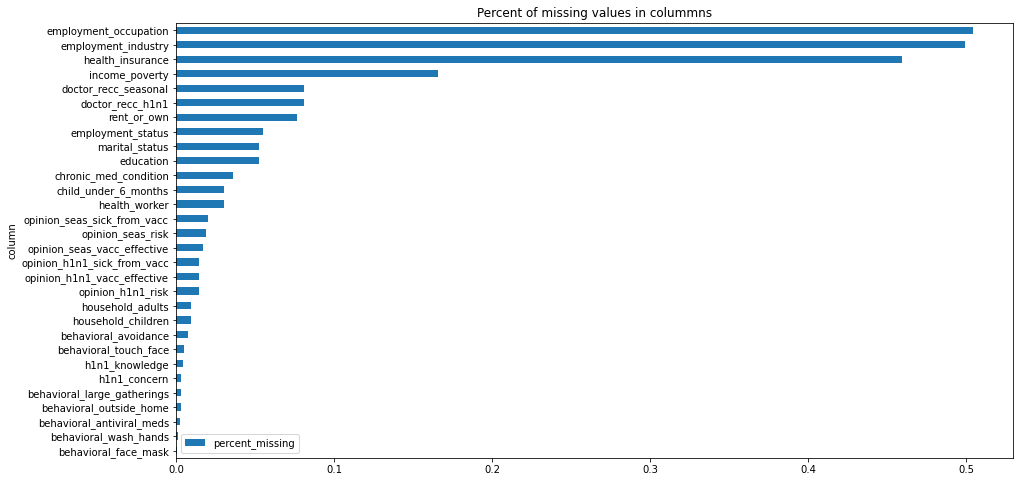

In [8]:
import pylab

def plot_missing_values(df):
    # Attribute: https://marloz.github.io/projects/sklearn/pipeline/missing/preprocessing/2020/03/20/sklearn-pipelines-missing-values.html
    """ For each column with missing values plot proportion that is missing."""
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['column', 'percent_missing']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('percent_missing')
    pylab.rcParams['figure.figsize'] = (15, 8)
    missing_df.plot(kind='barh', x='column', y='percent_missing'); 
    plt.title('Percent of missing values in colummns');
    
plot_missing_values(data)

In [9]:
data.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [10]:
# null values
print(f'''
There is {data.shape[0]} records and 
{data.shape[1]} variable in the dataset.
''')

print(f'Number of Missing values\n-------------------------\n{data.isna().sum().sort_values(ascending=False)}')


There is 26707 records and 
36 variable in the dataset.

Number of Missing values
-------------------------
employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n

## Feature Examination

'\nRoughy half of people received the seasonal flu vaccine. \nIn terms of class balance, \nwe say that the seasonal flu vaccine target has balanced classes.\n'

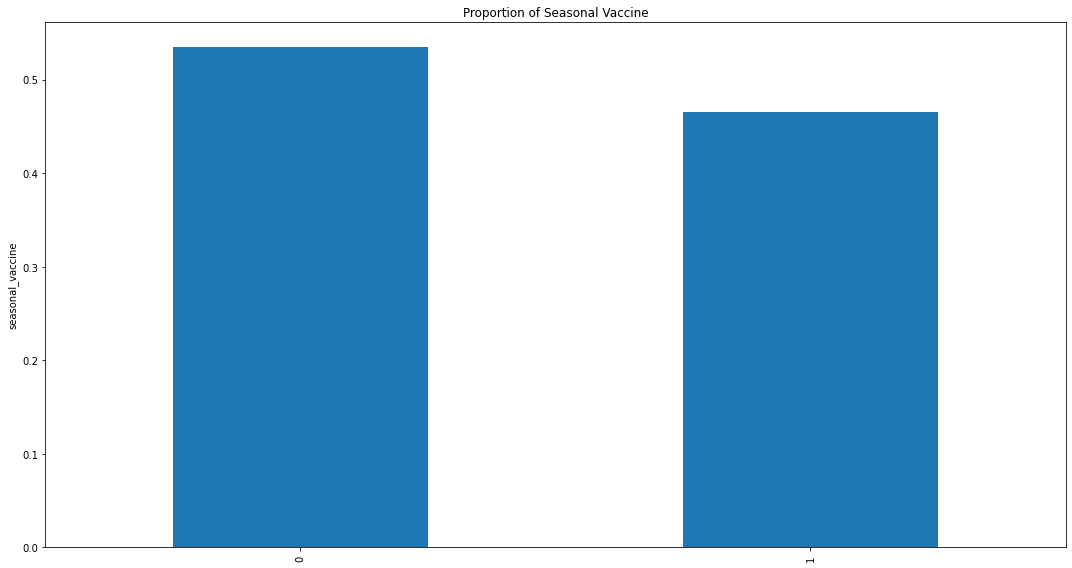

In [11]:
fig, ax = plt.subplots(1, 1, sharex=True)

n_obs = data.shape[0]

(data['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.bar(title="Proportion of Seasonal Vaccine", ax=ax)
)
ax.set_ylabel("seasonal_vaccine")

fig.tight_layout()

## Interpretation
'''
Roughy half of people received the seasonal flu vaccine. 
In terms of class balance, 
we say that the seasonal flu vaccine target has balanced classes.
'''

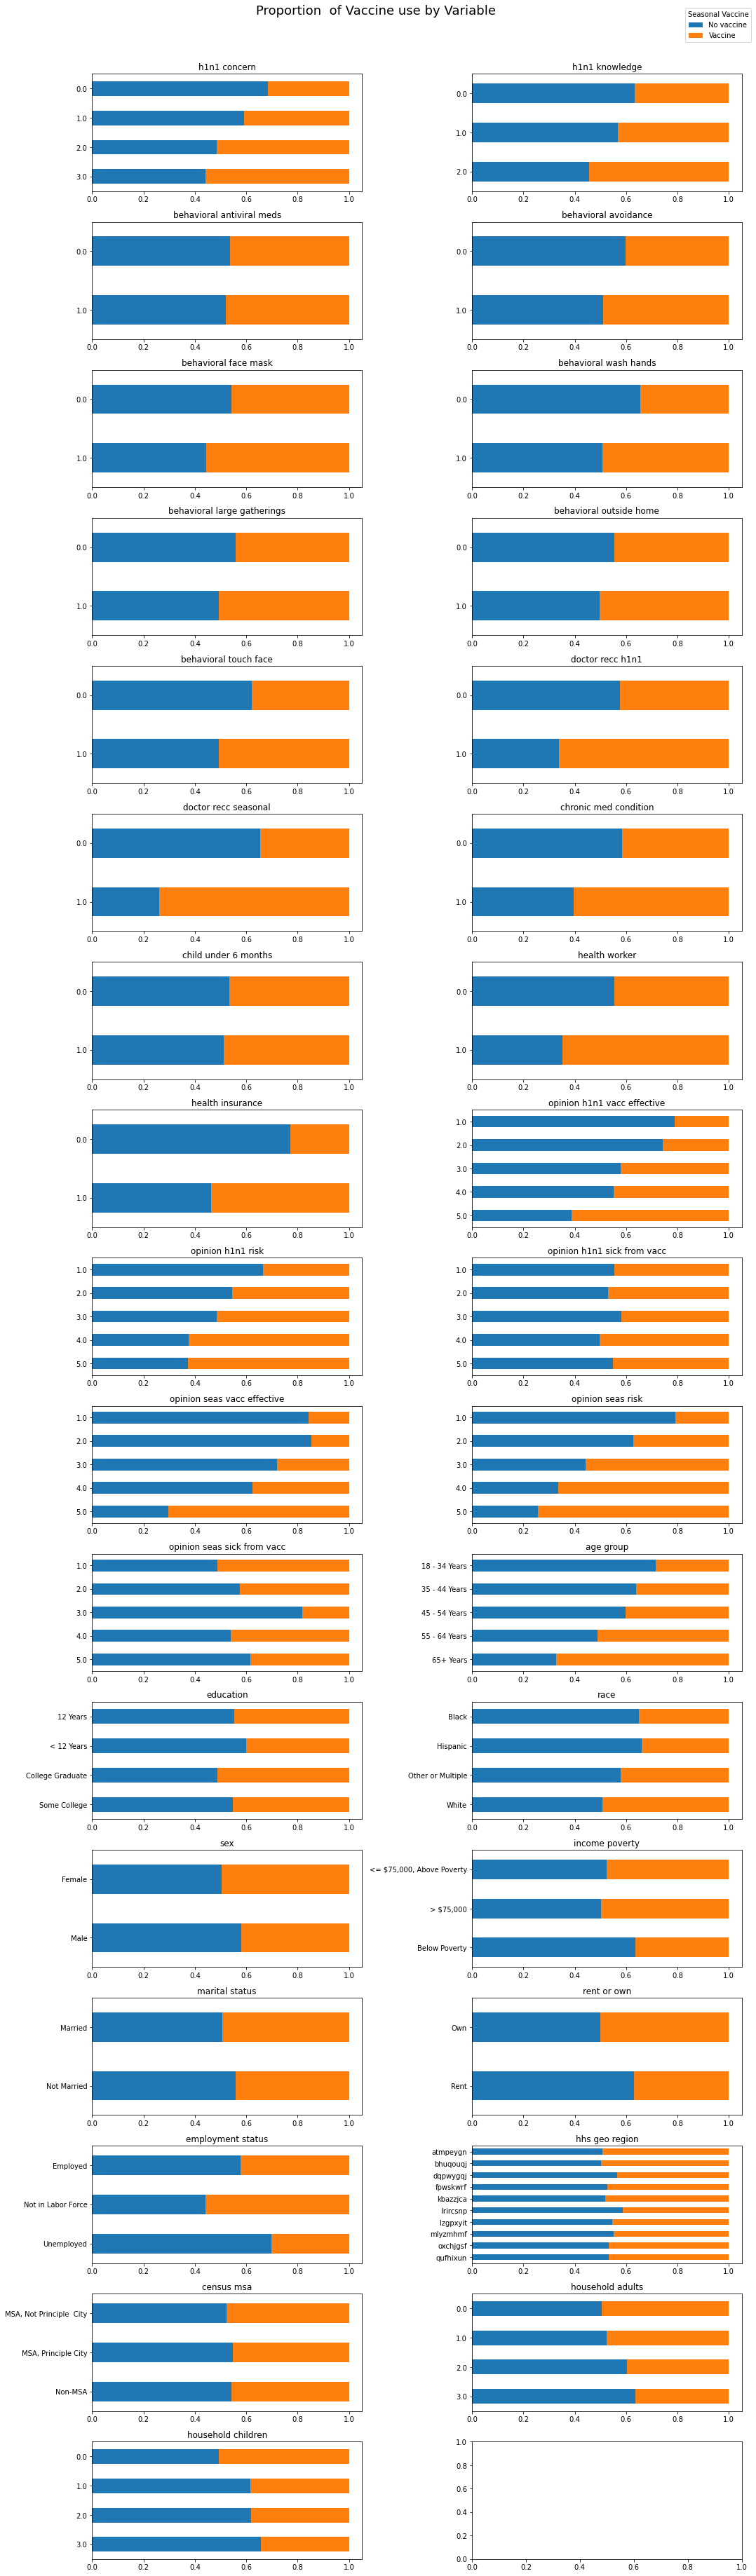

In [12]:
features = data.columns[:-3]
target='seasonal_vaccine'
# https://drivendata.co/blog/predict-flu-vaccine-data-benchmark/
# set number of columns
ncols = 2

# calculate number of rows
nrows = len(features) // ncols + (len(features) % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 50))
#fig.subplots_adjust(hspace=1.0, wspace=0.2)

# unpack the axes subplots
axe = axes.ravel()

# Assign the plot to each subplot in the axe
for idx, feature in enumerate(features):
    
    # Calculate the counts
    counts = (data[[target, feature]]
                  .groupby([target, feature])
                  .size()
                  .unstack(target))
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    props.plot(kind="barh", stacked=True, ax=axe[idx])
    
    # Chart formatting
    axe[idx].set_title(feature.replace('_', ' '))
    axe[idx].invert_yaxis()
    axe[idx].legend().remove()
    axe[idx].set_ylabel("")
    axe[idx].set_xlabel("")

fig.tight_layout()
fig.suptitle('Proportion  of Vaccine use by Variable', fontsize=18, y=1.02)
fig.legend(['No vaccine', 'Vaccine'], loc='upper right', bbox_to_anchor=(1, 1.02), title='Seasonal Vaccine')

### Placeholders for missing data

In [13]:
# Any placeholders?
# Look for top occuring values
print('2009 National Influenza Survey\n')
for col in data_features.columns:
    print(col, '\n', data_features[col].value_counts(normalize = True).head(10), '\n')

2009 National Influenza Survey

h1n1_concern 
 2.0    0.397332
1.0    0.306331
3.0    0.172497
0.0    0.123840
Name: h1n1_concern, dtype: float64 

h1n1_knowledge 
 1.0    0.548983
2.0    0.356775
0.0    0.094242
Name: h1n1_knowledge, dtype: float64 

behavioral_antiviral_meds 
 0.0    0.951156
1.0    0.048844
Name: behavioral_antiviral_meds, dtype: float64 

behavioral_avoidance 
 1.0    0.725612
0.0    0.274388
Name: behavioral_avoidance, dtype: float64 

behavioral_face_mask 
 0.0    0.931018
1.0    0.068982
Name: behavioral_face_mask, dtype: float64 

behavioral_wash_hands 
 1.0    0.825614
0.0    0.174386
Name: behavioral_wash_hands, dtype: float64 

behavioral_large_gatherings 
 0.0    0.64136
1.0    0.35864
Name: behavioral_large_gatherings, dtype: float64 

behavioral_outside_home 
 0.0    0.662685
1.0    0.337315
Name: behavioral_outside_home, dtype: float64 

behavioral_touch_face 
 1.0    0.677264
0.0    0.322736
Name: behavioral_touch_face, dtype: float64 

doctor_recc_h1n1

### Missing Data Correction Strategy

#### Interesting things about the dataset to keep in mind
* No missing data in `age_group`, `race`, `sex`, `hhs_geo_region`, and `census_msa`
* In `race`, hispanic is an option while on the U.S. Census it is listed as an ethnicity.
* There is an equal number of `NA` in `household_adults` and `household_children`
* There is an equal number of `NA` in `doctor_recc_h1n1` and `doctor_recc_seasonal`
* large porportion of missing data for `health_insurance`, `employment_industry`, and `employment_occupation`
* census_msa: msa means metropolitan statistical area. 
    * MSA = urban
    * MSA, Not Prinicple city = suburban
    * Non-MSA = rural
* `hhs_geo_region` is in code and won't be meaningful
* `employment_history` is coded and won't be meaningful
* `employment_occupation` is coded and won't be meaningful

#### Correcting Missing Data
The missing data may be due to error or refusal. The original documentation for the survey indicates the respondent can refuse to answer a question. 

Missing Data can be classfieid into 3 different groups:
* Missing Completely at Random (MCAR)
    * Missing is unrelated to observed and unobserved features
    * No relationship between missing values and any other observation in the dataset
* Missing at Random (MAR)
    * Missingness is related to observed features only
    * Example: Males not knowing chest and waist size
* Not missing at random (NMAR)
    * Missingness is related to unobserved feature (and maybe observed features too)
    * Example: Men may not answer questions about depression because of depression

My hypothesis is that the dataset contains a mixture of all three, MCAR, MAR, and NMAR missing data, but a large part of the dataset has missing dat is related to unobserved and observed features. There is a large amount of missing data in `health_insurance`, `income_poverty`, `employment_industry`, and `employment_occupation`. This may because large number of people refusing to answer these questions because of socioeconomic factors that the respondent feels are too private or fear how the information will be shared.

For this reason, I will keep missing data and create new variables to indicate that this respondent has missing information.

* For missing variables
    * For ordinal data
        * Replace NA with 0 to identify NA values
    * For binary data
        * Convert to dummy variables and treat as nominal
    * For nominal data
        * Retain NA by creating a new catagory is_na
    * Do after train-test-split

In [14]:
# # Encode ordinal
# ordinal_df = data.loc[:,['age_group', 'education', 'income_poverty']]
# ## NA of ordinal data will be set to 0
# ordinal_df.fillna(value='0', inplace=True)
# display(ordinal_df.isna().sum())

# ## Ordinal Encode age_group
# ordinal_df['age_group'] = ordinal_df['age_group'].map({'0': 0,
#                                                        '18 - 34 Years':1, 
#                                                        '35 - 44 Years':2, 
#                                                        '45 - 54 Years':3, 
#                                                        '55 - 64 Years':4, 
#                                                        '65+ Years':5})

# ## Ordinal Encode education
# ordinal_df['education'] = ordinal_df['education'].map({'0': 0,
#                                                        '< 12 Years':1, 
#                                                        '12 Years':2, 
#                                                        'Some College':3, 
#                                                        'College Graduate':4})

# ## Ordinal Encode income_poverty
# ordinal_df['income_poverty'] = ordinal_df['income_poverty'].map({'0': 0,
#                                                                  'Below Poverty':1, 
#                                                                  '<= $75,000, Above Poverty':2, 
#                                                                  '> $75,000':3})

In [15]:
# Encode Nominal data
## extract columns with object data type
## Convert all nominal data to dummy encoding while maininging NA values
nominal_df_encoded = pd.get_dummies(data.select_dtypes(include=['object']), dummy_na=True)

In [16]:
## binary data
## Binary data does not need to be encoded but needs to be extracted
## from the original dataframe for full data merge
### source https://stackoverflow.com/questions/32982034/which-columns-are-binary-in-a-pandas-dataframe\n",
import numpy as np
bool_cols = [col for col in data
             if np.isin(data[col].dropna().unique(), [0, 1]).all()][:-1]
bool_df = data.loc[:, bool_cols]

# Convert binary data to nominal to take into account the missing values
bool_df_encoded = pd.get_dummies(bool_df.astype('object'), dummy_na=True)

In [19]:
# Merge boolean, nominal, and ordinal data into one dataframe
#df_encoded = pd.concat([bool_df_encoded, nominal_df, ordinal_df], axis=1)
df_encoded = pd.concat([bool_df_encoded, nominal_df_encoded], axis=1)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Columns: 133 entries, behavioral_antiviral_meds_0.0 to employment_occupation_nan
dtypes: uint8(133)
memory usage: 3.4 MB


In [20]:
# Train-Test Split
# Done before any preprocessing to avoid data leakage

SEED = 42

from sklearn.model_selection import train_test_split
target = data['seasonal_vaccine'] # target
print(len(target))
features = df_encoded.copy() # features
print(features.shape)
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=SEED)

# split into training and validation datasets
#X_train, X_val, y_train, y_val = train_test_split(X_train,
#                                                  y_train,
#                                                  test_size=0.1,
#                                                  random_state=SEED)

26707
(26707, 133)


In [21]:
# Modeling
# Base model: Decision Tree
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score

clf_dt = tree.DecisionTreeClassifier(criterion='entropy')
dt_cv_score = cross_val_score(clf_dt, X_train, y_train, cv=5)
mean_dt_cv_score = dt_cv_score.mean()

print(f'Mean Cross Validation Score: {mean_dt_cv_score:.2%}')

# This shows the data is very overfitted on the training dataset

Mean Cross Validation Score: 61.79%


In [23]:
# Model 2: GridSearch with DecisionTree
from sklearn.model_selection import GridSearchCV

dt_param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 2, 3, 4, 5, 6],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1,2,3,4,5,6]
}

grid_search_dt = GridSearchCV(clf_dt, 
                              param_grid=dt_param_grid,
                              cv=5,
                              return_train_score=True,
                              verbose=True)

grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, verbose=True)

In [24]:
# Mean training score
gs_dt_training_score = np.mean(grid_search_dt.cv_results_['mean_train_score'])

# Mean test score
gs_dt_testing_score = grid_search_dt.score(X_test, y_test)

print(f"Mean Training Score: {gs_dt_training_score :.2%}")
print(f"Mean Test Score: {gs_dt_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
grid_search_dt.best_params_

Mean Training Score: 73.16%
Mean Test Score: 70.74%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [41]:
# Test set predictions
pred_test = grid_search_dt.best_estimator_.predict(X_test)

# Confusion matrix and classification report
print(metrics.confusion_matrix(y_test, pred_test))
print(metrics.classification_report(y_test, pred_test))

[[2736  898]
 [1056 1987]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      3634
           1       0.69      0.65      0.67      3043

    accuracy                           0.71      6677
   macro avg       0.71      0.70      0.70      6677
weighted avg       0.71      0.71      0.71      6677



In [26]:
# Extracting the importances by sklearn 
importances_sk = grid_search_dt.best_estimator_.fit(X_train, y_train).feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

#print(f"Feature importance by sklearn: {feature_importance_sk}")
display(pd.DataFrame(feature_importance_sk.items(), 
                     columns=['Feature', 
                              'Importance']).sort_values('Importance', ascending=False).head(10))


Feature  Importance
25         doctor_recc_seasonal_1.0       0.565
43              age_group_65+ Years       0.193
34                health_worker_1.0       0.080
39          age_group_18 - 34 Years       0.033
112  employment_occupation_dcjcmpih       0.024
91     employment_industry_fcxhlnwr       0.017
53                       race_White       0.017
47       education_College Graduate       0.017
42          age_group_55 - 64 Years       0.010
9         behavioral_wash_hands_0.0       0.007

In [39]:
# Decision Tree Plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(55,25), dpi=600)
tree.plot_tree(grid_search_dt.best_estimator_.fit(X_train, y_train), # choose best params
          feature_names = X_train.columns,
          class_names=np.unique(y_train).astype('str'),
          filled = True, rounded=True, fontsize=10)

plt.savefig('images/decision_tree_plot.png')
plt.show()
plt.close()

## Model 2 Random Forest
Random forest is a supervised learning algorithm that uses an ensemble of decision trees. A decision tree will maximize the information gain at every branch.

# Plotting

In [ ]:
# Distribution of target variable
# Drop h1n1_vaccine
# Should I make h1n1_vaccine a predictor variable?
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
#from scipy.stats import norm


def hist_plot(data, variable):
    '''
    Histogram plot function
    
    Produces a histogram plot of a variable in a set of data with skewness and
    kurtosis measurement.
    
    Skewness is a measure of asymmetry of a distribution. When the value of the 
    skewness is negative, the tail of the distribution is longer towards the left 
    hand side of the curve. When the value of the skewness is positive, the tail 
    of the distribution is longer towards the right hand side of the curve.
    
    Kurtosis describes the peakedness of the distribution.
    
    Input:
        data: pandas dataframe
        y: column of variable for the histogram
    Output:
        Histogram plot
        Skewness and kurtosis value
    References:
        Atan Dan
            https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
    '''
    y = data[variable]
    
    # PLot code
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    sns.distplot(y, fit=stats.norm, bins=30, kde=False, ax=ax[0]);
    ax[0].title.set_text(f'Histogram of {variable}')
    ax[0].set(xlabel=f'{variable}', ylabel='frequency')
    res = stats.probplot(data[variable], plot=ax[1]) # produce probability plot
    
    print(f'EDA of {variable} variable')
    ## Skewness
    print(f'Skewness: {y.skew()}')
    if y.skew() < -1 or y.skew() > 1:
        print(f'{variable} highly skewed')
    if y.skew() < -0.5 or y.skew() > 0.5:
        print(f'{variable} modertly skewed')
    if y.skew() < 0.5 and y.skew() > -0.5:
        print(f'{variable} symmetrical')
        
    ## Kurtosis
    print(f'Kurtosis: {y.kurt()}')
    if y.kurt() > 3:
        print(f'Distribution of {variable} is leptokurtic, tall and thin')
    if y.kurt() < 3:
        print(f'Distribution of {variable} is platykurtic, flat and spread out')
    else:
        print(f'Distribution of {variable} is mesokurticd, standard normal')

In [ ]:
hist_plot(data, 'seasonal_vaccine')

In [ ]:
# Put in pipelines
from sklearn.pipeline import Pipeline